### Clustering Analysis through Autoencoders

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df=pd.read_csv('marketing.csv')

In [3]:
creditcard_df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


* Cust_ID: Identification of credit card holder
* Balance: Balance amount left in customer account to make purchases.
* Balance_Frequency: How frequently balance is updated i.e score between 0 to 1(1-frequently updated  0-not frequently updated)
* Purchases: Amount of purchases made from account
* ONEOFF_Purchases : Maximum purchase amount done in One-go
* Installment_purchases : Amount of Purchases done in installments
* Cash_Advance : cash in advance given by user.
* PURCHASES_FREQUENCY: How frequently the purchases are made score between 0 to 1
* ONEOFF_PURCHASES_FREQUENCY: How frequently the purchases are made on one-go
* PURCHASES_INSTALLMENTS_FREQUENCY: How frequently the purchases are made on installments.
* CASH_ADVANCE_FREQUENCY:How frequently the cash in advance are paid.
* CASH_ADVANCE_TRX: Numer of transaction made with cash advance
* PURCHASES_TRX: Number of purchase transaction made
* Credit_Limit: Limit of Credit card for user
* PAYMENTS: Amount of payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payment done by user.
* PRC_FULL_PAYMENT: Percent of full payment done by user
* Tenure : Tenure of credit-card service for user

In [4]:
creditcard_df.shape

(8950, 18)

In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


From above table we can see that
* Mean banlace of all customer is 1564
* Most all customer update their balance at rate of 0.87
* Average purchase is 1000
* Average amount of purchases in one go is 592
* Average purchase frequency is around 0.5
* Averaage credit limit is around 4500
* Percentage of full payment is 15%
* Average tenure is 11-12 years

and many more we can check to learn

# Auto Encoders

In [55]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=2aefe5d43b2a8ed74a8e1180a3f3d2fd07d7d4247f22f9619361da483574d9b3
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [57]:
from tensorflow.keras.layers import Input,Add,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D,AveragePooling2D
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [58]:
encoding_dim = 7
input_df = Input(shape=(17,))

x= Dense(encoding_dim,activation='relu')(input_df)
x= Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
x= Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
x= Dense(2000,activation='relu',kernel_initializer='glorot_uniform')(x)

encoded = Dense(10,activation='relu',kernel_initializer='glorot_uniform')(x)
x= Dense(2000,activation='relu',kernel_initializer='glorot_uniform')(encoded)
x= Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)

decoded = Dense(17,kernel_initializer='glorot_uniform')(x)

# Autoencoder
autoencoder = Model(input_df,decoded)

# Encoder which is used for dimensio reduction
encoder = Model(input_df,encoded)

autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [59]:
# lets fit auto encoder on scaled data set
autoencoder.fit(creditcard_df_scaled,creditcard_df_scaled,batch_size=128,epochs=25,verbose=1)

Epoch 1/25
70/70 [==============================] - 6s 58ms/step - loss: 0.5563
Epoch 2/25
70/70 [==============================] - 4s 57ms/step - loss: 0.3445
Epoch 3/25
70/70 [==============================] - 4s 57ms/step - loss: 0.2735
Epoch 4/25
70/70 [==============================] - 4s 62ms/step - loss: 0.2224
Epoch 5/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1917
Epoch 6/25
70/70 [==============================] - 4s 59ms/step - loss: 0.1784
Epoch 7/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1631
Epoch 8/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1601
Epoch 9/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1466
Epoch 10/25
70/70 [==============================] - 4s 55ms/step - loss: 0.1432
Epoch 11/25
70/70 [==============================] - 4s 64ms/step - loss: 0.1378
Epoch 12/25
70/70 [==============================] - 4s 63ms/step - loss: 0.1293
Epoch 13/25
70/70 [==================

In [60]:
autoencoder.save_weights('autoencoder.h5')

In [61]:
pred=encoder.predict(creditcard_df_scaled)

In [62]:
pred.shape

(8950, 10)

In [ ]:
# Hence by seeing the shape we have reduced the dimension from 17 to 10

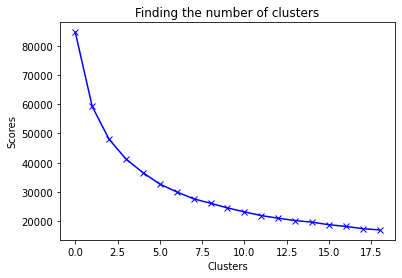

In [63]:
scores_2=[]

for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)#Inertia means sum of squares difference within clusters
    
plt.plot(scores_2,'bx-')#this bhx- gives dot on grap
plt.title('Finding the number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

In [64]:
# Apply k means clustering
kmeans=KMeans(4)
kmeans.fit(pred)
labels=kmeans.labels_
y_kmeans=kmeans.fit_predict(creditcard_df_scaled)

In [66]:
df_cluster_dr = pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})],axis=1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [68]:
# Applying PCA
pca=PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data=prin_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.860113,-0.364344
1,2.406305,-1.059105
2,-1.035007,0.736790
3,-0.984628,0.267938
4,-1.682099,-0.324524


In [69]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.860113,-0.364344,0
1,2.406305,-1.059105,1
2,-1.035007,0.736790,0
3,-0.984628,0.267938,0
4,-1.682099,-0.324524,0


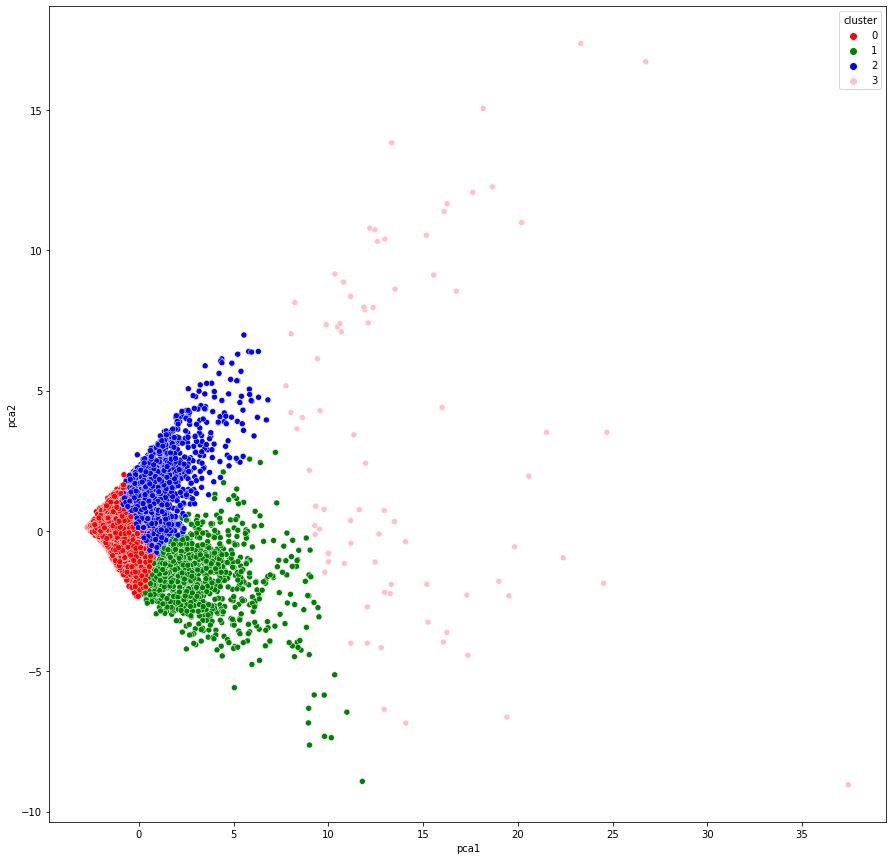

In [73]:
plt.figure(figsize=(15,15))
ax= sns.scatterplot(x="pca1",y="pca2",hue='cluster',data=pca_df,palette=['red','green','blue','pink'])
plt.show()